In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt  


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

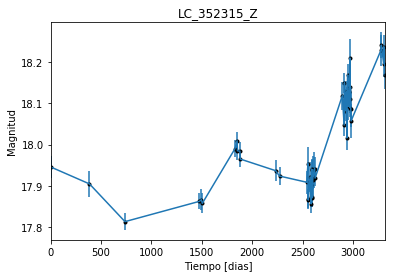

In [2]:
data = np.genfromtxt('LC_352315_Z.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_352315_Z')
plt.savefig("LC_352315_Z.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

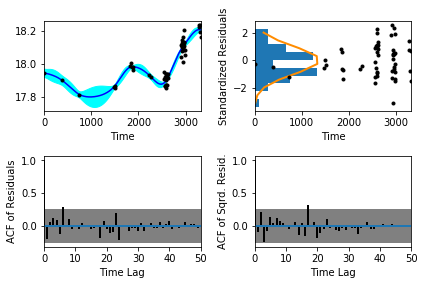

In [5]:
sample.assess_fit()

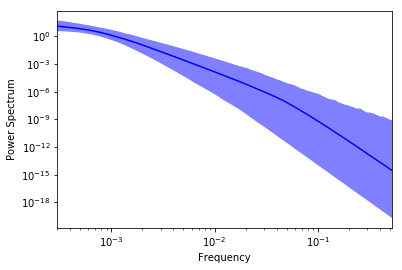

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

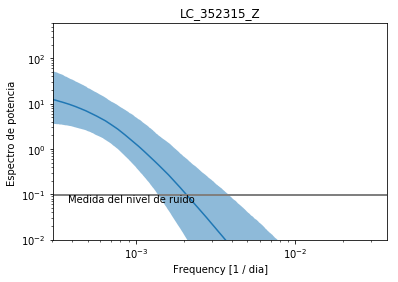

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_352315_Z')
plt.savefig("Medida del nivel de ruido_Z.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_352315_Z')

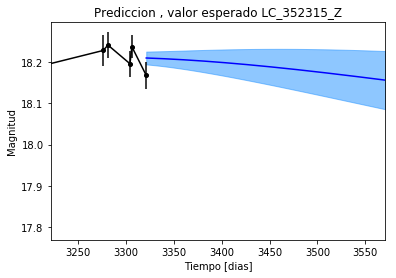

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_352315_Z')

Text(0.5,1,'Prediccion, Caminos simulados_LC_352315_Z')

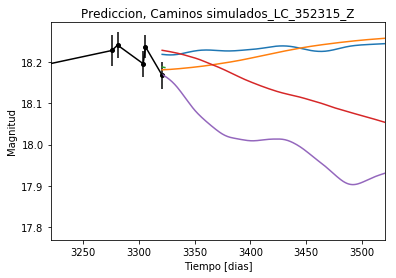

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados_LC_352315_Z')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


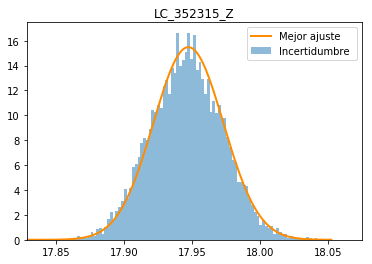

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_352315_Z')
plt.savefig("Mejor_ajuste_LC_352315_Z.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_352315_Z')

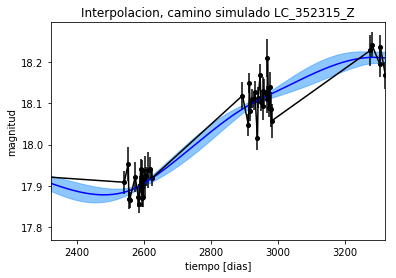

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_352315_Z')

Text(0.5,1,'Interpolacion, camino simulado LC_352315_Z')

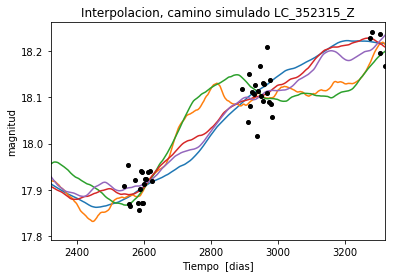

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_352315_Z')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 244.706682254
Median: 0.00687186487122
Standard deviation: 0.184133380312
68% credibility interval: [ 0.00058619  0.1372852 ]
95% credibility interval: [  3.26353227e-04   7.26009686e-01]
99% credibility interval: [  3.05996746e-04   9.69256000e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 607.740245378
Median: 0.0007678936015
Standard deviation: 0.0650702106034
68% credibility interval: [ 0.00037157  0.01079279]
95% credibility interval: [ 0.00031058  0.17010285]
99% credibility interval: [  3.02037400e-04   5.14776562e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 377.407142152
Median: 0.00425019918578
Standard

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1316.98586517
Median: 120.631784585
Standard deviation: 1.55743095034
68% credibility interval: [ 118.83183622  121.70768398]
95% credibility interval: [ 116.37923337  122.21353409]
99% credibility interval: [ 114.27455396  122.35969252]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 634.576055964
Median: 0.468889198274
Standard deviation: 1.83683577399
68% credibility interval: [ 0.03370848  2.998862  ]
95% credibility interval: [ 0.01113646  6.40624963]
99% credibility interval: [  8.98647212e-03   9.02361729e+00]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 1460.00418179
Median: 0.0991770432135
Standard deviation: 7.37740813107
68% credibility interval: [ 0.00605094  3.99582321]
95% credibility interval: [  4.

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 2561.35871911
Median: 5.4179491314e-49
Standard deviation: 108413218.114
68% credibility interval: [  3.88121505e-79   2.80668876e-20]
95% credibility interval: [  7.93696256e-120   5.16833179e-003]
99% credibility interval: [  7.25557002e-144   4.38321929e+001]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 1878.66504744
Median: 17.9641436423
Standard deviation: 0.0826738687975
68% credibility interval: [ 17.89575318  18.03645458]
95% credibility interval: [ 17.79821894  18.13468355]
99% credibility interval: [ 17.70176804  18.22482918]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 387.448325489
Median: 0.000372115310024
Standard deviation: 0.219293099912
68% credibility interval: [ 0.          0.21004218]
95% credibility interval: [ 0.          0.82985635]
99% credibility interval: [ 0.          1.00394189]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 387.448325489
Median: 0.000372115310024
Standard deviation: 0.219293099912
68% credibility interval: [ 0.          0.21004218]
95% credibility interval: [ 0.          0.82985635]
99% credibility interval: [ 0.          1.00394189]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 949.759164697
Median: 0.0
Standard deviation: 0.000201663475657
68

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1316.98586517
Median: 120.631784585
Standard deviation: 1.55743095034
68% credibility interval: [ 118.83183622  121.70768398]
95% credibility interval: [ 116.37923337  122.21353409]
99% credibility interval: [ 114.27455396  122.35969252]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1063.03041963
Median: 0.0192754147168
Standard deviation: 0.0206491798707
68% credibility interval: [ 0.01136503  0.03713881]
95% credibility interval: [ 0.00725547  0.07821084]
99% credibility interval: [ 0.00543224  0.12665322]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 2309.4503636
Median: 1.19540474932
Standard deviation: 0.181122400644
68% credibility interval: [ 1.03468305  1.38632998]
95% credibility interval: [ 0.91279701  1.61548452]
99% credibility interval: [ 0.83898666  1.79669058]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 1783.32978459
Median: 5.92238095416e-06
Standard deviation: 0.00382917739282
68% credibility interval: [  2.53514226e-07   2.94958144e-04]
95% credibility interval: [  1.28188286e-08   2.08896763e-03]
99% credibility interval: [  1.22909955e-09   7.25388488e-03]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 244.706682254
Median: (-0.0431772003918+0j)
Standard deviation: 1.79917083533
68% credibility interval: [-0.86258833+0.j        -0.00368317-0.0011759j]
95% credibility interval: [ -4.56165339e+00+0.j          -2.05053780e-03-0.00450267j]
99% credibility interval: [ -6.09001506e+00+0.j          -1.92263426e-03-0.00088051j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 607.740245378
Median: (-0.00482481779442+0.00296575317688j)
Standard deviation: 1.43723789699
68% credibility interval: [-0.06781310+3.30628811j -0.00233466+0.00446676j]
95% credibility interval: [-1.06878774+2.82777884j -0.00195146+0.j        ]
99% credibility interval: [ -3.23443653e+00+1.93657536j  -1.89775695e-03+0.j        ]
Posterior summary for pa